## Classifying Iris Species

Let’s assume that a hobby botanist is interested in distinguishing the species of some
iris flowers that she has found. She has collected some measurements associated with
each iris: the length and width of the petals and the length and width of the sepals, all
measured in centimeters.

She also has the measurements of some irises that have been previously identified by
an expert botanist as belonging to the species setosa, versicolor, or virginica. For these
measurements, she can be certain of which species each iris belongs to. Let’s assume
that these are the only species our hobby botanist will encounter in the wild.
Our goal is to build a machine learning model that can learn from the measurements
of these irises whose species is known, so that we can predict the species for a new
iris.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import mglearn
import numpy as np

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
iris_data = load_iris()
iris_data["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
print(iris_data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print(iris_data["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
print(iris_data["target_names"]) # las especies que queremos predecir

['setosa' 'versicolor' 'virginica']


In [13]:
iris_data['data'].shape

(150, 4)

In [7]:
iris_data["data"].shape #filas vs columnas

(150, 4)

In [8]:
print("First five columns of data:\n{}".format(iris_data['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [9]:
#Ahora crearemos nuestros datos de entrenamiento y de prueba

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(iris_data["data"], iris_data["target"], random_state = 0)

In [12]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [13]:
print("X_train shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_test.shape))

X_train shape: (38, 4)
y_train shape: (38,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16e83ad0>,
      dtype=object)

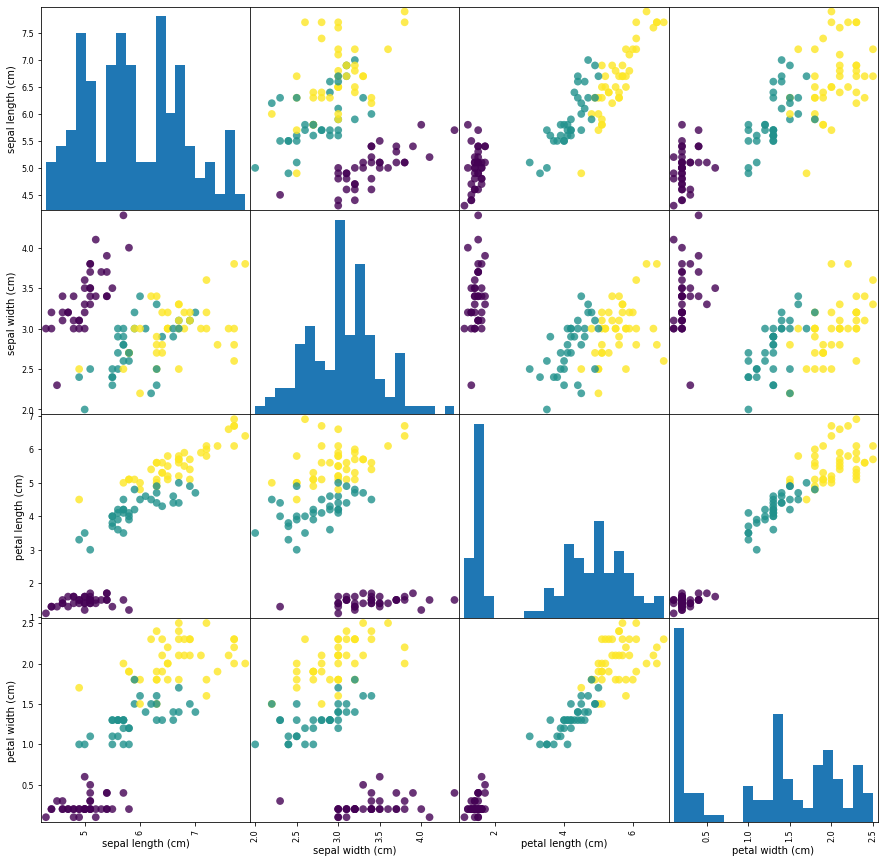

In [14]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_data["feature_names"])
# create a scatter matrix from the dataframe, color by y_train
scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [18]:
#Predicciones 
x_new = np.array([[5,2.9,1,0.2]])
print("x_new.shape: {}".format(x_new.shape))

x_new.shape: (1, 4)


In [19]:
prediction = knn.predict(x_new)

In [20]:
print("prediction {}".format(prediction))
print("Prediction target name {}".format(iris_data["target_names"][prediction]))

prediction [0]
Prediction target name ['setosa']


In [21]:
y_pred = knn.predict(X_test)
print("tests sets prediction:\n {}".format(y_pred))

tests sets prediction:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [22]:
print("target{}".format(y_test))

target[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


In [23]:
#Obtenemos una precisión del 97%
print("test set score: {}".format(np.mean(y_pred == y_test)))

test set score: 0.9736842105263158


In [24]:
knn.score(X_test,y_test)

0.9736842105263158

## Classification and Regression
There are two major types of supervised machine learning problems, called classification and regression.
In classification, the goal is to predict a class label, which is a choice from a predefined
list of possibilities.

For regression tasks, the goal is to predict a continuous number, or a floating-point
number in programming terms (or real number in mathematical terms).

## Generalization, Overfitting, and Underfitting

   * In supervised learning, we want to build a model on the training data and then be able to make accurate predictions on new, unseen data that has the same characteristics as the training set that we used. If a model is able to make accurate predictions on unseen data, we say it is able to generalize from the training set to the test set.
   
   * Building a model that is too complex for the amount of information we have, is called overfitting.
   
   * Choosing too simple a model is called underfitting.
   
The more complex we allow our model to be, the better we will be able to predict on
the training data. However, if our model becomes too complex, we start focusing too
much on each individual data point in our training set, and the model will not gener‐
alize well to new data.
There is a sweet spot in between that will yield the best generalization performance.
This is the model we want to find.

In [25]:
import sys
import mglearn

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [29]:
!{sys.executable} -m pip install mglearn

X.shape: (26, 2)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


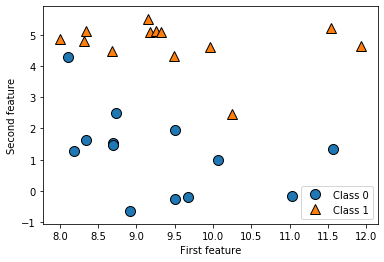

In [26]:
#Classification algorithms
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

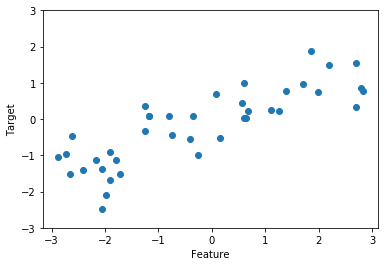

In [27]:
#regression algorithms
A, b = mglearn.datasets.make_wave(n_samples=40)
plt.plot(A, b, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

### Classification and regression datasets

In [28]:
#classification
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys:\n {}".format(cancer.keys()))

cancer.keys:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [29]:
print("cancer.dat.shape:\n{}".format(cancer.data.shape))

cancer.dat.shape:
(569, 30)


In [30]:
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [31]:
np.bincount?

In [32]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [33]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [34]:
#Regression
from sklearn.datasets import load_boston
boston = load_boston()
print("load_boston.shape:\n {}".format(boston.data.shape))

load_boston.shape:
 (506, 13)


In [35]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

For our purposes here, we will actually expand this dataset by not only
considering these 13 measurements as input features, but also looking at all products
(also called interactions) between features. In other words, we will not only consider
crime rate and highway accessibility as features, but also the product of crime rate
and highway accessibility. Including derived feature like these is called feature engineering.

This derived dataset can be loaded using the load_extended_boston function:

In [36]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


## k-Nearest Neighbors

The k-NN algorithm is arguably the simplest machine learning algorithm. Building
the model consists only of storing the training dataset. To make a prediction for a
new data point, the algorithm finds the closest data points in the training dataset—its
“nearest neighbors.”

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


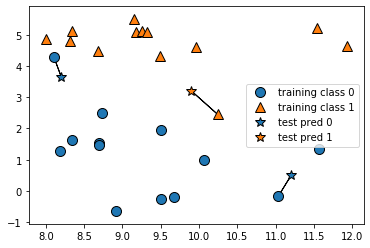

In [37]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


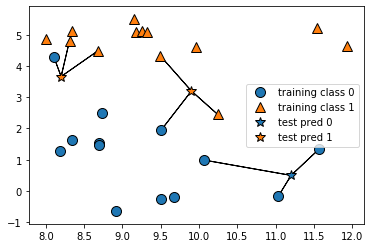

In [38]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Again, the prediction is shown as the color of the cross. You can see that the prediction for the new data point at the top left is not the same as the prediction when we
used only one neighbor.

Now let’s look at how we can apply the k-nearest neighbors algorithm using scikit-learn. First, we split our data into a training and a test set so we can evaluate generalization performance.

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X, y = mglearn.datasets.make_forge()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)

Next, we import and instantiate the class. This is when we can set parameters, like the number of neighbors to use.

In [42]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

Now, we fit the classifier using the training set. For KNeighborsClassifier this
means storing the dataset, so we can compute neighbors during prediction:

In [43]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

To make predictions on the test data, we call the predict method. For each data point
in the test set, this computes its nearest neighbors in the training set and finds the
most common class among these:

In [44]:
print("Predictions: {}".format(clf.predict(X_test))), X_test

Predictions: [1 0 1 0 1 0 0]


(None, array([[11.54155807,  5.21116083],
        [10.06393839,  0.99078055],
        [ 9.49123469,  4.33224792],
        [ 8.18378052,  1.29564214],
        [ 8.30988863,  4.80623966],
        [10.24028948,  2.45544401],
        [ 8.34468785,  1.63824349]]))

To evaluate how well our model generalizes, we can call the score method with the
test data together with the test labels:

In [45]:
print("Test set accuracy:\n {}".format(clf.score(X_test,y_test)))

Test set accuracy:
 0.8571428571428571


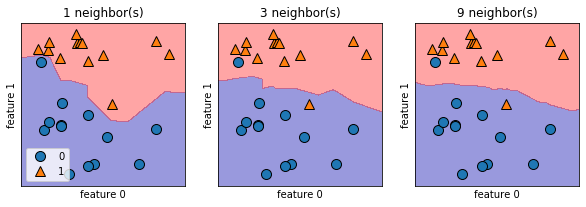

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

Let’s investigate whether we can confirm the connection between model complexity
and generalization

In [47]:
from sklearn.datasets import load_breast_cancer

In [48]:
cancer = load_breast_cancer()

In [49]:
cancer.data.shape, cancer.keys()

((569, 30),
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=66)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
training_accuracy=[]
test_accuracy = []
neighbors_settings = range(1,11)
for neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
    

In [53]:
training_accuracy, test_accuracy

([1.0,
  0.9671361502347418,
  0.9671361502347418,
  0.9553990610328639,
  0.9483568075117371,
  0.9483568075117371,
  0.9436619718309859,
  0.9413145539906104,
  0.9460093896713615,
  0.9413145539906104],
 [0.9230769230769231,
  0.9020979020979021,
  0.9230769230769231,
  0.916083916083916,
  0.916083916083916,
  0.916083916083916,
  0.9090909090909091,
  0.9090909090909091,
  0.9090909090909091,
  0.9090909090909091])

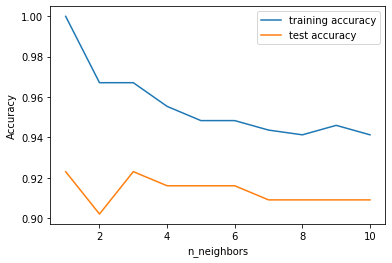

In [54]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#### k-neighbors regression

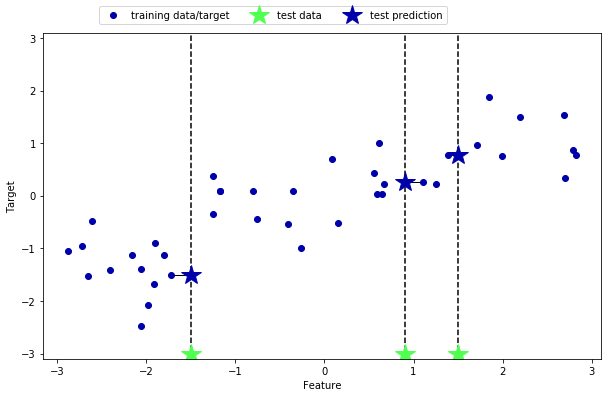

In [55]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

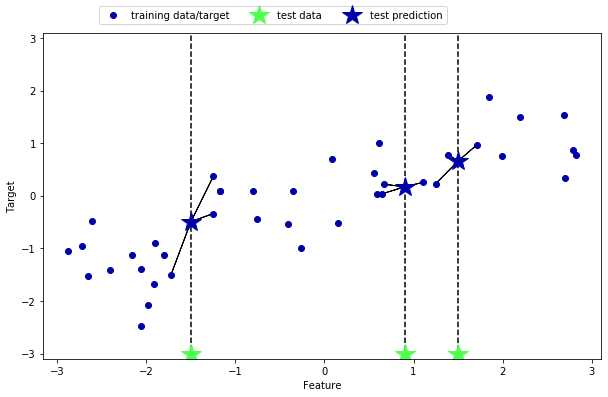

In [56]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

The k-nearest neighbors algorithm for regression is implemented in the KNeighbors
Regressor class in scikit-learn.

In [57]:
from sklearn.neighbors import KNeighborsRegressor

In [58]:
X, y = mglearn.datasets.make_wave(n_samples=40)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)

In [60]:
regress = KNeighborsRegressor()

In [61]:
regress.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [62]:
print("Test set predictions:\n {}".format(regress.predict(X_test)))

Test set predictions:
 [-0.31560601  0.15952474  1.02677816 -1.69801095 -1.40261905 -1.77581224
  0.24824413  0.99712017 -0.10897279 -1.40261905]


We can also evaluate the model using the score method, which for regressors returns
the R^2 score. The R^2
score, also known as the coefficient of determination, is a measure of goodness of a prediction for a regression model, and yields a score between 0
and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds
to a constant model that just predicts the mean of the training set responses, y_train:

In [63]:
print("R^2 score: {}".format(regress.score(X_test,y_test)))

R^2 score: 0.7071381144011731


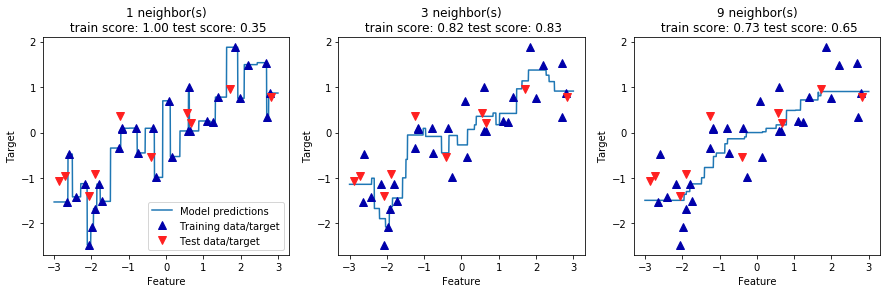

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
"Test data/target"], loc="best")

## Linear models

w[0]: 0.393906  b: -0.031804


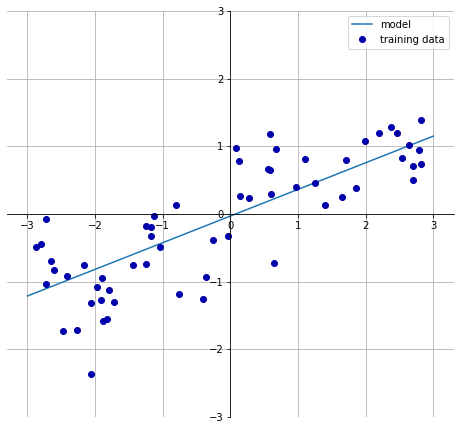

In [65]:
mglearn.plots.plot_linear_regression_wave()

### Linear regression (aka ordinary least squares)

Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y,
on the training set. The mean squared error is the sum of the squared differences
between the predictions and the true values. Linear regression has no parameters,
which is a benefit, but it also has no way to control model complexity.

In [66]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train,y_train)

The “slope” parameters (w), also called weights or coefficients, are stored in the coef_
attribute, while the offset or intercept (b) is stored in the intercept_ attribute:

In [67]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


The intercept_ attribute is always a single float number, while the coef_ attribute is
a NumPy array with one entry per input feature. As we only have a single input feature in the wave dataset, lr.coef_ only has a single entry.

In [68]:
# accuracy
print("Train set score: {}".format(lr.score(X_train,y_train)))
print("Test set score: {}".format(lr.score(X_test,y_test)))

Train set score: 0.6700890315075756
Test set score: 0.65933685968637


Let’s take a look at how LinearRe
gression performs on a more complex dataset, like the Boston Housing dataset.
Remember that this dataset has 506 samples and 105 derived features.

In [69]:
X, y = mglearn.datasets.load_extended_boston()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

In [71]:
#When comparing training set and test set scores, we find that we predict very accurately on the training set, 
#but the R^2 on the test set is much worse:

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


This discrepancy between performance on the training set and the test set is a clear
sign of overfitting, and therefore we should try to find a model that allows us to control complexity.

### Ridge regression
Ridge regression is also a linear model for regression, so the formula it uses to make
predictions is the same one used for ordinary least squares. In ridge regression,
though, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to
zero. Intuitively, this means each feature should have as little effect on the outcome as
possible (which translates to having a small slope), while still predicting well. This
constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression is known as L2 regularization.

In [72]:
from sklearn.linear_model import Ridge

In [73]:
ridge = Ridge().fit(X_train,y_train)

In [74]:
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


**A less complex model means worse performance on the training
set, but better generalization.**

In [75]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [76]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


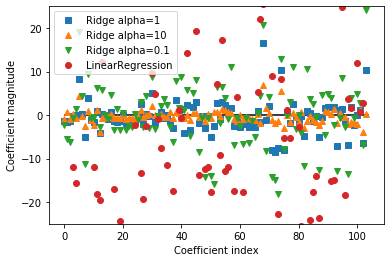

In [77]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

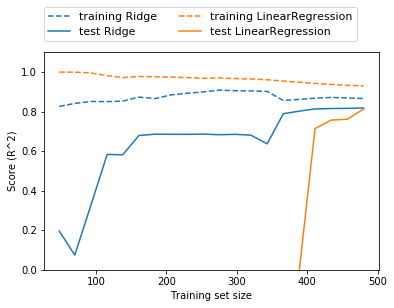

In [78]:
mglearn.plots.plot_ridge_n_samples()

### Lasso
An alternative to Ridge for regularizing linear regression is Lasso. As with ridge
regression, using the lasso also restricts coefficients to be close to zero, but in a
slightly different way, called L1 regularization. The consequence of L1 regularization
is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to
interpret, and can reveal the most important features of your model.

In [79]:
from sklearn.linear_model import Lasso

In [80]:
lasso = Lasso().fit(X_train,y_train)

In [81]:
print("Training set score: {}".format(lasso.score(X_train, y_train)))
print("Test set score: {}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29323768991114596
Test set score: 0.20937503255272272
Number of features used: 4


In [82]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [83]:
#If we set alpha too low, however, we again remove the effect of regularization and end
#up overfitting, with a result similar to LinearRegression:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

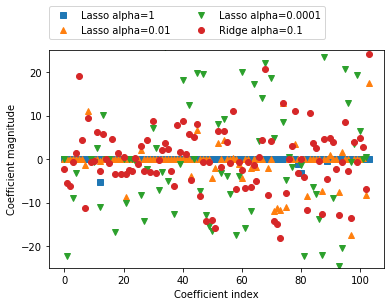

In [84]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")


### Linear models for classification

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


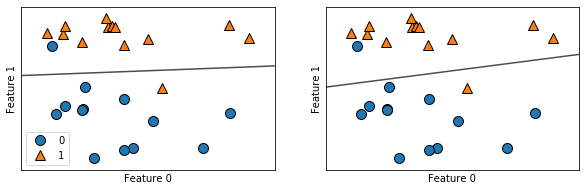

In [95]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2, figsize=(10,3))
for model, ax in zip([LinearSVC(),LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X, fill=False, eps =0.5,
                                   ax = ax, alpha = .7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    #ax.set_title("{}".format(clf.__class.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()


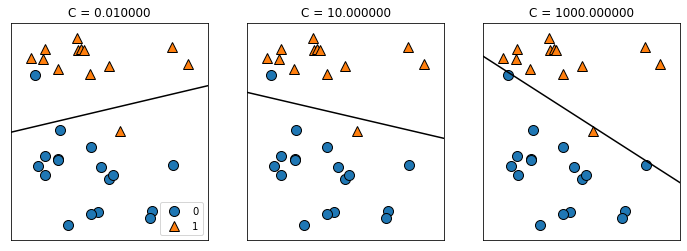

In [96]:
mglearn.plots.plot_linear_svc_regularization()

In [97]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                            stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [101]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [103]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


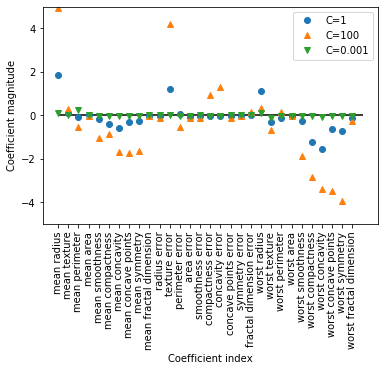

In [104]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


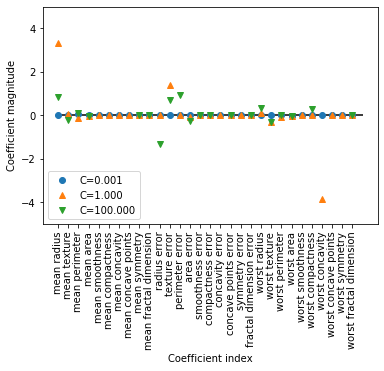

In [105]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

### Linear models for multiclass classification

In [4]:
from sklearn.datasets import make_blobs

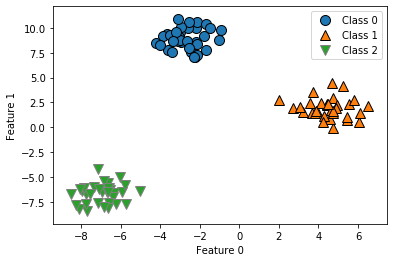

In [112]:
X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [113]:
# Now we train a linearSVC on the dataset:
linear_svm = LinearSVC().fit(X,y)
print("Coefficient shape ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape  (3, 2)
Intercept shape:  (3,)


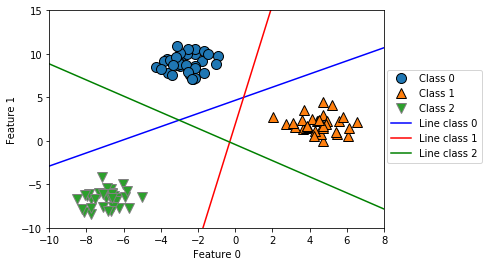

In [114]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))

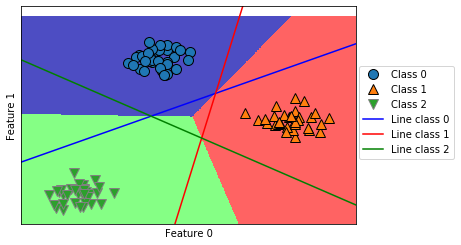

In [115]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))

## Naive Bayes Classifiers

Naive Bayes classifiers are a family of classifiers that are quite similar to the linear
models discussed in the previous section. However, they tend to be even faster in
training. The price paid for this efficiency is that naive Bayes models often provide
generalization performance that is slightly worse than that of linear classifiers like
LogisticRegression and LinearSVC.

There are three kinds of naive Bayes classifiers implemented in scikit-learn: GaussianNB, BernoulliNB, and MultinomialNB. GaussianNB can be applied to
any continuous data, while BernoulliNB assumes binary data and MultinomialNB
assumes count data (that is, that each feature represents an integer count of something, like how often a word appears in a sentence). BernoulliNB and MultinomialNB
are mostly used in text data classification.

In [116]:
 X = np.array([[0, 1, 0, 1],
[1, 0, 1, 1],
[0, 0, 0, 1],
[1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [118]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


## Decision trees.

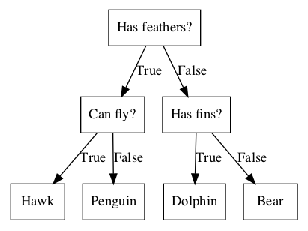

In [4]:
mglearn.plots.plot_animal_tree()

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [23]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state = 42)

In [8]:
#Creating the model
tree = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)

In [9]:
print("Accuracy on training set: {}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {}".format(tree.score(X_test,y_test)))

Accuracy on training set: 1.0
Accuracy on test set: 0.9370629370629371


A leaf of the tree that contains data points that all share the same target value is called pure.

If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep
and complex. Unpruned trees are therefore prone to overfitting and not generalizing
well to new data.

In [10]:
#One option is to stop building the
#tree after a certain depth has been reached. Here we set max_depth=4, meaning only
#four consecutive questions can be asked
tree = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train,y_train)

In [11]:
print("Accuracy on training set: {}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {}".format(tree.score(X_test,y_test)))

Accuracy on training set: 0.9882629107981221
Accuracy on test set: 0.951048951048951


We can visualize the tree using the export_graphviz function from the tree module.
This writes a file in the .dot file format, which is a text file format for storing graphs.

In [12]:
from sklearn.tree import export_graphviz

In [13]:
export_graphviz(tree, out_file= "tree.dot", class_names=["malignant","benign"],
               feature_names=cancer.feature_names, impurity = False, filled =True)

In [14]:
import graphviz

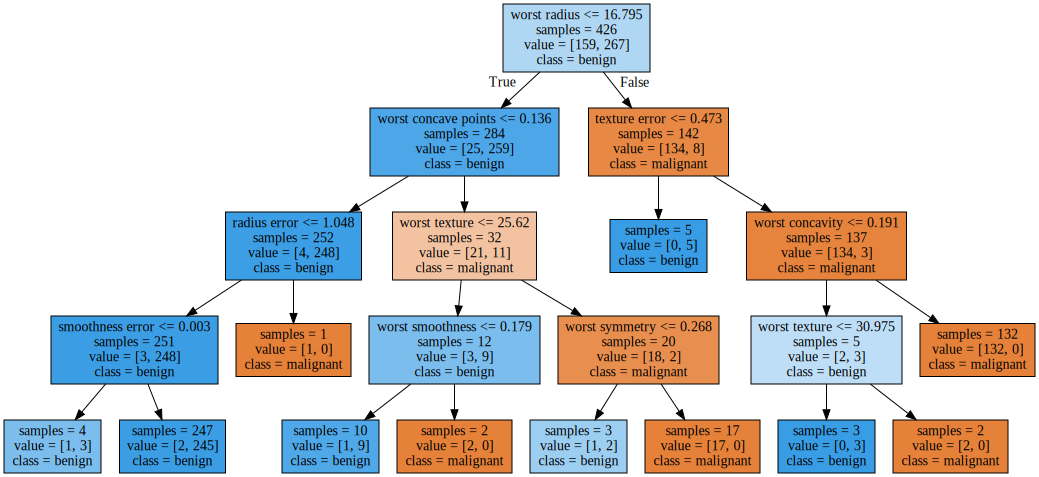

In [17]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Feature importance in trees

Instead of looking at the whole tree, which can be taxing, there are some useful properties that we can derive to summarize the workings of the tree. The most commonly
used summary is feature importance, which rates how important each feature is for
the decision a tree makes. It is a number between 0 and 1 for each feature, where 0
means “not used at all” and 1 means “perfectly predicts the target.” The feature
importances always sum to 1:

In [18]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [26]:
cancer.feature_names
import numpy as np

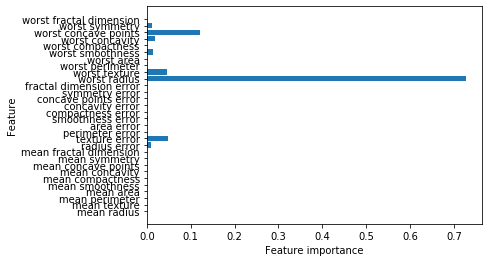

In [27]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


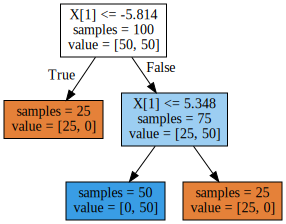

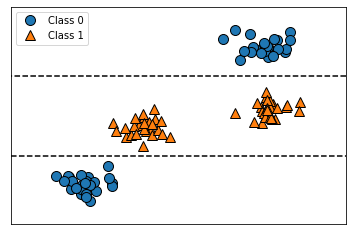

In [28]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

The usage and analysis of regression trees is very similar to that of
classification trees. There is one particular property of using tree-based models for
regression that we want to point out, though. The DecisionTreeRegressor (and all
other tree-based regression models) is not able to extrapolate, or make predictions
outside of the range of the training data.

### Random forests

A random forest
is essentially a collection of decision trees, where each tree is slightly different from
the others. The idea behind random forests is that each tree might do a relatively
good job of predicting, but will likely overfit on part of the data. If we build many
trees, all of which work well and overfit in different ways, we can reduce the amount
of overfitting by averaging their results.

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [30]:
X, y = make_moons(n_samples=100, noise=0.25,random_state=3)
X_train,X_test, y_train,y_test= train_test_split(X,y,stratify = y, random_state=42)

In [31]:
forest = RandomForestClassifier(n_estimators=5, random_state=2).fit(X_train,y_train)

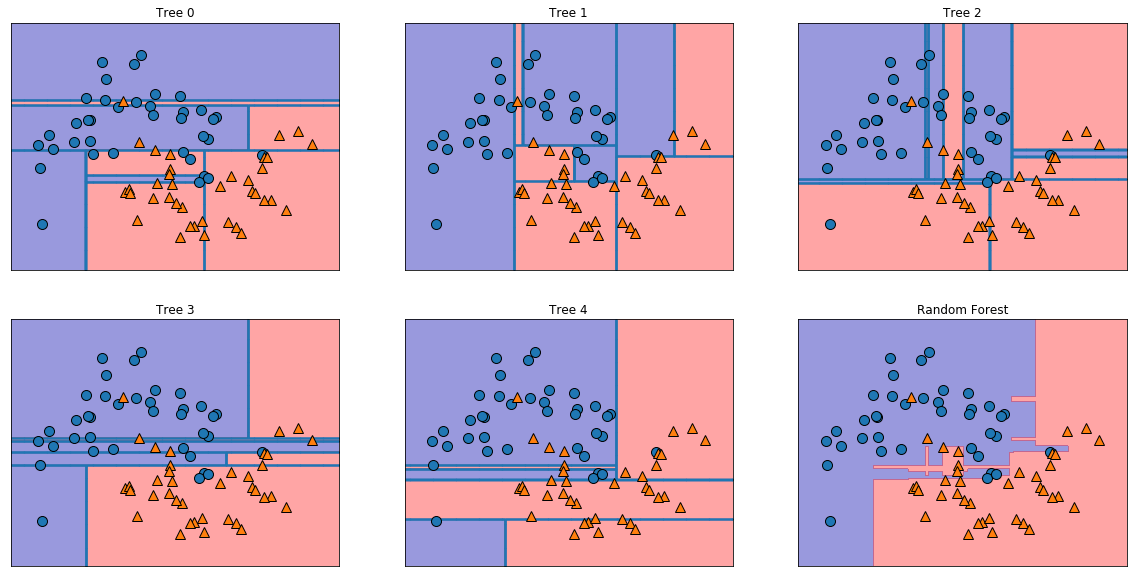

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

You can clearly see that the decision boundaries learned by the five trees are quite dif‐
ferent. Each of them makes some mistakes, as some of the training points that are
plotted here were not actually included in the training sets of the trees, due to the
bootstrap sampling.
The random forest overfits less than any of the trees individually, and provides a
much more intuitive decision boundary. In any real application, we would use many
more trees (often hundreds or thousands), leading to even smoother boundaries.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [35]:
print("Feature importances:\n{}".format(forest.feature_importances_))

Feature importances:
[0.02515433 0.01563844 0.05372655 0.04861645 0.00769078 0.00936994
 0.05539489 0.10305394 0.0065771  0.00282708 0.02921459 0.00607814
 0.01342868 0.03420174 0.00360641 0.00432096 0.00448775 0.00657502
 0.00460597 0.00627095 0.11657269 0.01603133 0.16027724 0.0634688
 0.01356448 0.01164113 0.03923725 0.11711756 0.01164259 0.00960721]


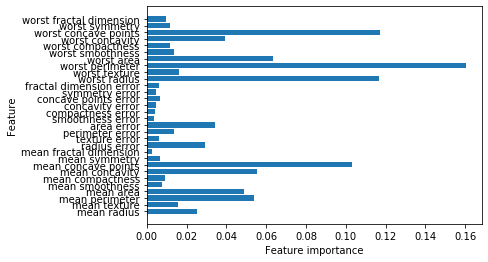

In [36]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(forest)

As you can see, the random forest gives nonzero importance to many more features
than the single tree. Similarly to the single decision tree, the random forest also gives
a lot of importance to the “worst radius” feature, but it actually chooses “worst perim‐
eter” to be the most informative feature overall. The randomness in building the ran‐
dom forest forces the algorithm to consider many possible explanations, the result
being that the random forest captures a much broader picture of the data than a sin‐
gle tree.

### Gradient boosted regression (gradient boosting machines)
In contrast to the
random forest approach, gradient boosting works by building trees in a serial man‐
ner, where each tree tries to correct the mistakes of the previous one. By default, there
is no randomization in gradient boosted regression trees; instead, strong pre-pruning
is used.

Apart from the pre-pruning and the number of trees in the ensemble, another impor‐
tant parameter of gradient boosting is the learning_rate, which controls how
strongly each tree tries to correct the mistakes of the previous trees. A higher learning
rate means each tree can make stronger corrections, allowing for more complex mod‐
els. Adding more trees to the ensemble, which can be accomplished by increasing
n_estimators, also increases the model complexity, as the model has more chances
to correct mistakes on the training set.

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)

In [38]:
#By default, 100 trees of maximum depth 3 and a learning rate of 0.1 are used:
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train,y_train)

In [39]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfit‐
ting, we could either apply stronger pre-pruning by limiting the maximum depth or
lower the learning rate:

In [40]:
gbrt = GradientBoostingClassifier(max_depth=1,random_state=0).fit(X_train,y_train)

In [41]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [42]:
gbrt = GradientBoostingClassifier(learning_rate=0.01,random_state=0).fit(X_train,y_train)

In [43]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


In [44]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train,y_train)

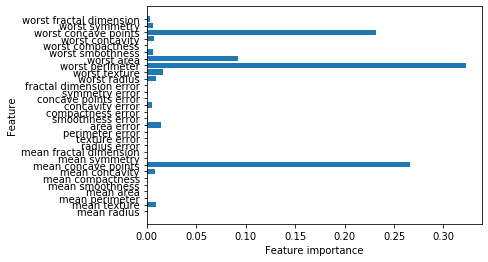

In [45]:
plot_feature_importances_cancer(gbrt)
#We can see that the feature importances of the gradient boosted trees are somewhat
#similar to the feature importances of the random forests, though the gradient boost‐
#ing completely ignored some of the features.

## Kernelized Support Vector Machines

Linear models can be quite limiting in low-dimensional
spaces, as lines and hyperplanes have limited flexibility. One way to make a linear
model more flexible is by adding more features—for example, by adding interactions
or polynomials of the input features.

In [6]:
X, y = make_blobs(centers = 4, random_state=8)
y = y%2

Text(0, 0.5, 'Feature 1')

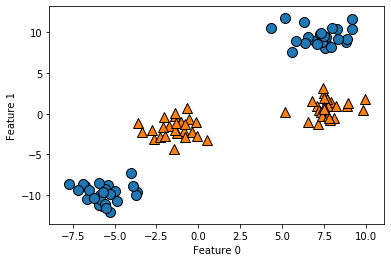

In [7]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")



In [8]:
# A linear model for classification can only separate points using a line, and will not be
# able to do a very good job on this dataset
from sklearn.svm import LinearSVC

In [9]:
linear_svm = LinearSVC().fit(X,y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

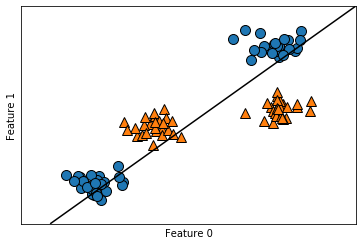

In [10]:
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


Now let’s expand the set of input features, say by also adding feature1 ** 2, the
square of the second feature, as a new feature. Instead of representing each data point

as a two-dimensional point, (feature0, feature1), we now represent it as a three-
dimensional point, (feature0, feature1, feature1 ** 2).

Text(0.5, 0, 'feature1 ** 2')

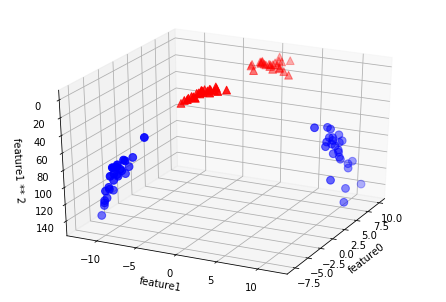

In [16]:
# add the squared first feature
X_new = np.hstack([X,X[:,1:]**2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev = -152, azim=-26)
# plot first all points with y == 0 then all with y == 1
mask = y==0
ax.scatter(X_new[mask,0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

In the new representation of the data, it is now indeed possible to separate the two
classes using a linear model, a plane in three dimensions. We can confirm this by fit‐
ting a linear model to the augmented data

In [17]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


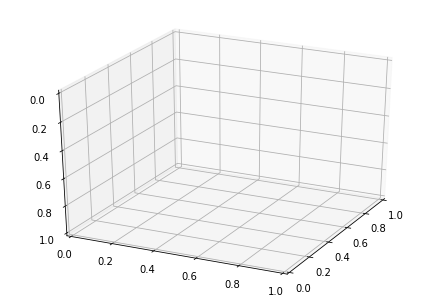

In [20]:
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  


Text(0.5, 0, 'feature0 ** 2')

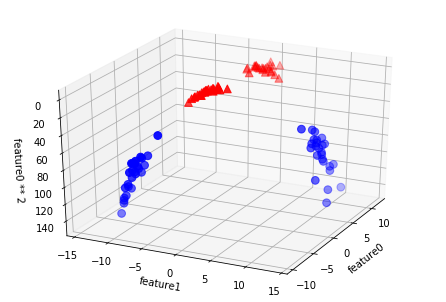

In [29]:
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0]*XX + coef[1]**YY + intercept)/-coef[2]
ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride=8, alpha =0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
cmap=mglearn.cm2, s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

Text(0, 0.5, 'Feature 1')

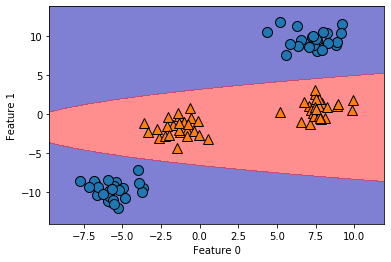

In [32]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

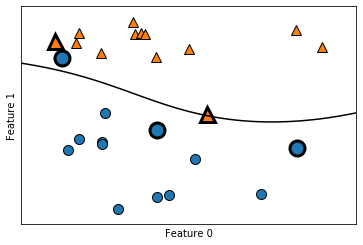

In [34]:
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel= "rbf", C = 10, gamma = 0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps =0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
#plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

The gamma parameter,
which controls the width of the Gaussian kernel. It determines the scale of what it
means for points to be close together. The C parameter is a regularization parameter,
similar to that used in the linear models. It limits the importance of each point (or
more precisely, their dual_coef_).

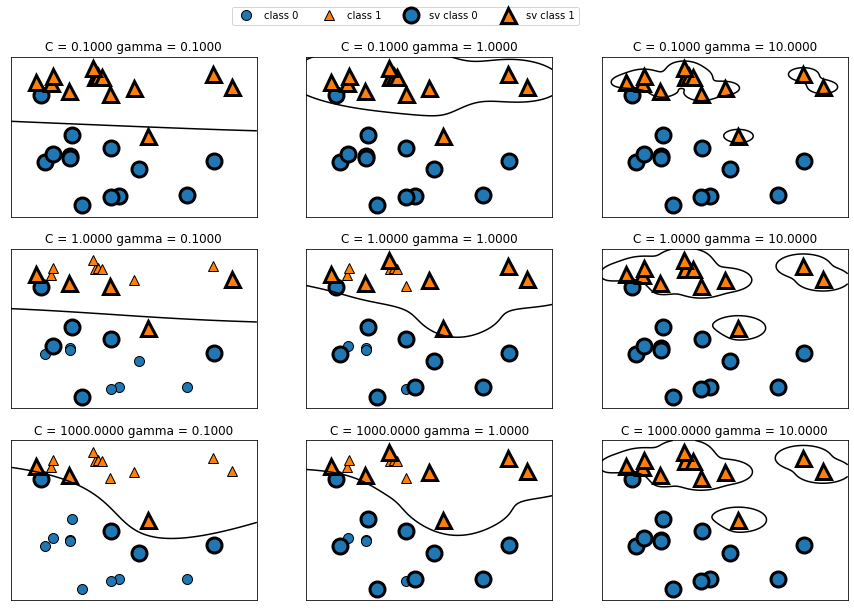

In [35]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
ncol=4, loc=(.9, 1.2))

Going from left to right, we increase the value of the parameter gamma from 0.1 to 10.
A small gamma means a large radius for the Gaussian kernel, which means that many
points are considered close by. This is reflected in very smooth decision boundaries
on the left, and boundaries that focus more on single points further to the right. A
low value of gamma means that the decision boundary will vary slowly, which yields a
model of low complexity, while a high value of gamma yields a more complex model.

Going from top to bottom, we increase the C parameter from 0.1 to 1000. As with the
linear models, a small C means a very restricted model, where each data point can
only have very limited influence. You can see that at the top left the decision bound‐
ary looks nearly linear, with the misclassified points barely having any influence on
the line. Increasing C, as shown on the bottom right, allows these points to have a
stronger influence on the model and makes the decision boundary bend to correctly
classify them.

In [38]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [37]:
cancer = load_breast_cancer()

In [39]:
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target,random_state = 0)

In [40]:
svc = SVC().fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [41]:
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


The model overfits quite substantially, with a perfect score on the training set and
only 63% accuracy on the test set. While SVMs often perform quite well, they are
very sensitive to the settings of the parameters and to the scaling of the data. In par‐
ticular, they require all the features to vary on a similar scale. Let’s look at the mini‐
mum and maximum values for each feature, plotted in log-space

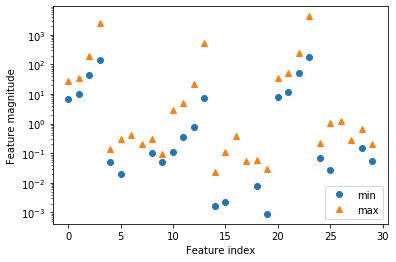

In [42]:
plt.plot(X_train.min(axis=0),"o",label="min")
plt.plot(X_train.max(axis=0),"^",label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")



From this plot we can determine that features in the Breast Cancer dataset are of
completely different orders of magnitude. This can be somewhat of a problem for
other models (like linear models), but it has devastating effects for the kernel SVM.

One way to resolve this problem is by rescaling each feature so that they are all
approximately on the same scale.

In [44]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)
# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [45]:
# use THE SAME transformation on the test set,
# using min and range of the training set 
X_test_scaled = (X_test - min_on_training) / range_on_training

In [47]:
svc = SVC().fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [48]:
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


Scaling the data made a huge difference! Now we are actually in an underfitting
regime, where training and test set performance are quite similar but less close to
100% accuracy. From here, we can try increasing either C or gamma to fit a more com‐
plex model.

In [49]:
svc = SVC(C=1000).fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [50]:
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


### Tuning neural networks

Text(0, 0.5, 'relu(x), tanh(x)')

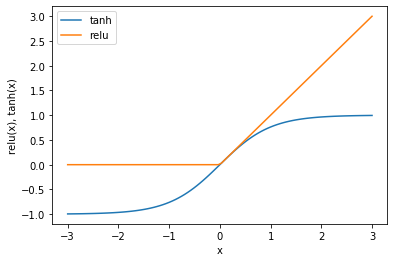

In [2]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

#The relu cuts off values below zero, while tanh
#saturates to –1 for low input values and +1 for high input values. Either nonlinear
#function allows the neural network to learn much more complicated functions than a
#linear model could:

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [5]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train,y_test= train_test_split(X,y, stratify =y, 
                                                 random_state=42)

In [12]:
mlp =MLPClassifier(solver="lbfgs", random_state=0).fit(X_train,y_train)

Text(0, 0.5, 'Feature 1')

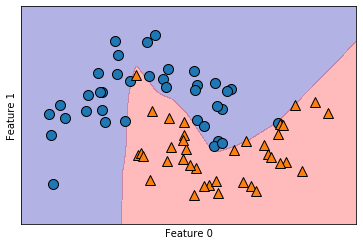

In [13]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

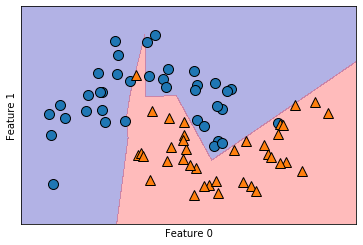

In [14]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

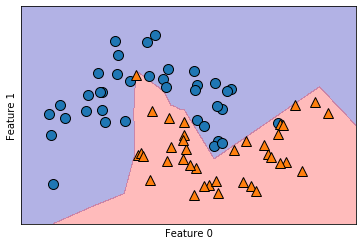

In [15]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0,
hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

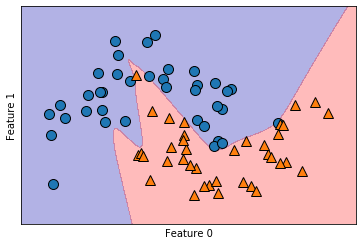

In [16]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

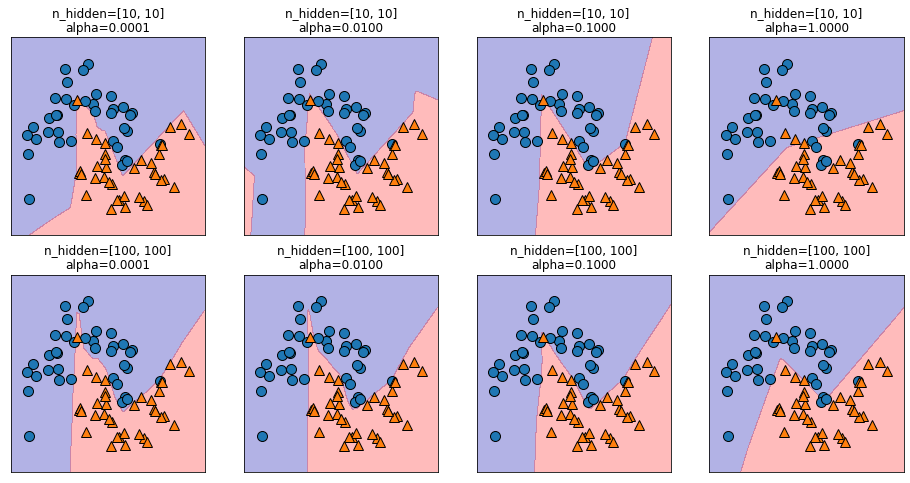

In [18]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                n_hidden_nodes, n_hidden_nodes, alpha))

let’s apply the
MLPClassifier to the Breast Cancer dataset.

In [20]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per.feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

In [22]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [23]:
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


The accuracy of the MLP is quite good, but not as good as the other models. As in the
earlier SVC example, this is likely due to scaling of the data. Neural networks also
expect all input features to vary in a similar way, and ideally to have a mean of 0, anda variance of 1.

In [24]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

In [27]:
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

In [28]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
        mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The results are much better after scaling, and already quite competitive. We got a
warning from the model, though, that tells us that the maximum number of iterations
has been reached. This is part of the adam algorithm for learning the model, and tells
us that we should increase the number of iterations:

In [29]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
        mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


Increasing the number of iterations only increased the training set performance, not
the generalization performance. Still, the model is performing quite well. As there is
some gap between the training and the test performance, we might try to decrease the
model’s complexity to get better generalization performance. Here, we choose to
increase the alpha parameter (quite aggressively, from 0.0001 to 1) to add stronger
regularization of the weights:

In [30]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


## Uncertainty Estimates from Classifiers

There are two different functions in scikit-learn that can be used to obtain uncer‐
tainty estimates from classifiers: decision_function and predict_proba. Most (but
not all) classifiers have at least one of them, and many classifiers have both.

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles

In [32]:
X, y = make_circles(noise=0.25, factor=0.5,random_state=1)

In [33]:
# we rename the classes "blue" and "red" for illustration purposes
y_named = np.array(["blue", "red"])[y]

In [35]:
# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner

X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### The decision function

In the binary classification case, the return value of decision_function is of shape
(n_samples,), and it returns one floating-point number for each sample:

In [36]:
print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(
gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


This value encodes how strongly the model believes a data point to belong to the
“positive” class, in this case class 1. Positive values indicate a preference for the posi‐
tive class, and negative values indicate a preference for the “negative” (other) class:

In [39]:
# show the first few entries of decision_function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6]))

Decision function:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [41]:
# We can recover the prediction by looking only at the sign of the decision function:

print("Thersholded decision function:\n{}".format(gbrt.decision_function(X_test)>0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Thersholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


### Predicting Probabilities

The output of predict_proba is a probability for each class, and is often more easily
understood than the output of decision_function. It is always of shape (n_samples,
2) for binary classification:

In [42]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

Shape of probabilities: (25, 2)


The first entry in each row is the estimated probability of the first class, and the sec‐
ond entry is the estimated probability of the second class. Because it is a probability,
the output of predict_proba is always between 0 and 1, and the sum of the entries
for both classes is always 1:

In [43]:
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


Because the probabilities for the two classes sum to 1, exactly one of the classes will
be above 50% certainty. That class is the one that is predicted.

You can see in the previous output that the classifier is relatively certain for most
points. How well the uncertainty actually reflects uncertainty in the data depends on
the model and the parameters. A model that is more overfitted tends to make more
certain predictions, even if they might be wrong. A model with less complexity usually has more uncertainty in its predictions. A model is called calibrated if the
reported uncertainty actually matches how correct it is—in a calibrated model, a prediction made with 70% certainty would be correct 70% of the time.

### Uncertainty in Multiclass Classification
So far, we’ve only talked about uncertainty estimates in binary classification. But the
decision_function and predict_proba methods also work in the multiclass setting.
Let’s apply them on the Iris dataset, which is a three-class classification dataset:

In [44]:
from sklearn.datasets import load_iris
iris = load_iris()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [46]:
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
# plot the first few entries of the decision function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

Decision function shape: (38, 3)
Decision function:
[[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


In the multiclass case, the decision_function has the shape (n_samples,
n_classes) and each column provides a “certainty score” for each class, where a large
score means that a class is more likely and a small score means the class is less likely.
You can recover the predictions from these scores by finding the maximum entry for
each data point:

In [47]:
print("Argmax of decision function:\n{}".format(
np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


The output of predict_proba has the same shape, (n_samples, n_classes). Again,
the probabilities for the possible classes for each data point sum to 1:

In [48]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6]))
# show that sums across rows are one
print("Sums: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Predicted probabilities:
[[0.10217734 0.78840063 0.10942203]
 [0.7834712  0.1093673  0.1071615 ]
 [0.09818079 0.11005862 0.79176059]
 [0.10217734 0.78840063 0.10942203]
 [0.10360014 0.66723882 0.22916105]
 [0.7834712  0.1093673  0.1071615 ]]
Sums: [1. 1. 1. 1. 1. 1.]


In [49]:
print("Argmax of predicted probabilities:\n{}".format(
np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


#### Nearest neighbors
For small datasets, good as a baseline, easy to explain.

#### Linear models
Go-to as a first algorithm to try, good for very large datasets, good for very high-
dimensional data.

#### Naive Bayes
Only for classification. Even faster than linear models, good for very large data‐
sets and high-dimensional data. Often less accurate than linear models.

#### Decision trees
Very fast, don’t need scaling of the data, can be visualized and easily explained.

#### Random forests
Nearly always perform better than a single decision tree, very robust and power‐
ful. Don’t need scaling of data. Not good for very high-dimensional sparse data.

#### Gradient boosted decision trees
Often slightly more accurate than random forests. Slower to train but faster to
predict than random forests, and smaller in memory. Need more parameter tun‐
ing than random forests.

#### Support vector machines
Powerful for medium-sized datasets of features with similar meaning. Require
scaling of data, sensitive to parameters.

#### Neural networks
Can build very complex models, particularly for large datasets. Sensitive to scal‐
ing of the data and to the choice of parameters. Large models need a long time to
train.

When working with a new dataset, it is in general a good idea to start with a simple
model, such as a linear model or a naive Bayes or nearest neighbors classifier, and see
how far you can get. After understanding more about the data, you can consider
moving to an algorithm that can build more complex models, such as random forests,
gradient boosted decision trees, SVMs, or neural networks.